<center><h1>Máster en Big Data Analytics and Visualization </header1></center>
<left><h1>Trabajo Fin de Máster
<left><h2>Universidad Internacional La Rioja

Presentado por: Nerea Valdés Egocheaga <br>
Fecha: 23/05/2024

## Importación de librerias necesarias

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


## Cargar el Dataset

Se utiliza un Dataset público, que puede encontrarse en Kaggle:
https://www.kaggle.com/datasets/undersc0re/flight-delay-and-causes/data




In [47]:
# Código para cargar el Dataset
data = pd.read_csv('Flight_delay.csv')  

## Caracterización del Dataset


In [48]:
print("Forma del Dataset: ", data.shape)
# Hay 29 columnas y 484.551 filas

print("\nPrimeras filas del dataset:")
print(data.head())

# Se crea una variable más para contabilizar los registros con retraso de vuelo mayor a 3 horas
print("\nNúmero de clases en la variables objetivo (Retraso de vuelo > 180 minutos):")
data['Delayed_Over_3h'] = (data['ArrDelay'] > 180).astype(int)
print(data['Delayed_Over_3h'].value_counts())

print("Nombres de las Columnas:")
for nombre_columna in data.columns:
    print(nombre_columna)

print("\nResumen estadístico: \n")
data.describe()

Forma del Dataset:  (484551, 29)

Primeras filas del dataset:
   DayOfWeek        Date  DepTime  ArrTime  CRSArrTime UniqueCarrier  \
0          4  03-01-2019     1829     1959        1925            WN   
1          4  03-01-2019     1937     2037        1940            WN   
2          4  03-01-2019     1644     1845        1725            WN   
3          4  03-01-2019     1452     1640        1625            WN   
4          4  03-01-2019     1323     1526        1510            WN   

                  Airline  FlightNum TailNum  ActualElapsedTime  ...  TaxiIn  \
0  Southwest Airlines Co.       3920  N464WN                 90  ...       3   
1  Southwest Airlines Co.        509  N763SW                240  ...       3   
2  Southwest Airlines Co.       1333  N334SW                121  ...       6   
3  Southwest Airlines Co.        675  N286WN                228  ...       7   
4  Southwest Airlines Co.          4  N674AA                123  ...       4   

   TaxiOut  Cancelled  C

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Over_3h
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,...,484551.000000,484551.000000,484551.0,484551.0,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,...,6.782413,19.150876,0.0,0.0,17.419440,3.153284,13.599421,0.082033,26.653587,0.040588
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,...,5.555816,15.309747,0.0,0.0,39.417893,19.503657,31.454655,1.884774,40.535994,0.197334
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,...,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,...,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000,0.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,...,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000,0.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,...,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000,1.000000


Se identifican las 29 variables o columnas:

* DayOfWeek → 1 (Monday) - 7 (Sunday)
* Date → Scheduled date
* DepTime → Actual departure time (local, hhmm)
* ArrTime → Actual arrival time (local, hhmm)
* CRSArrTime → Scheduled arrival time (local, hhmm)
* UniqueCarrier → Unique carrier code
* Airline → Airline company
* FlightNum → flight number
* TailNum → plane tail number
* ActualElapsedTime → Actual time an airplane spends in the air(in minutes) with TaxiIn/Out
* CRSElapsedTime → CRS Elapsed Time of Flight (estimated elapse time), in minutes
* AirTime → Flight Time (in minutes)
* ArrDelay → Difference in minutes between scheduled and actual arrival time
* Origin → Origin IATA(International Air Transport Association) airport code
* Org_Airport → Origin Airport Name
* Dest → Destination IATA code
* Dest_Airport → Destination Airport Name
* Distance → Distance between airports (miles)
* TaxiIn → Wheels down and arrival at the destination airport gate, in minutes
* TaxiOut → The time elapsed between departure from the origin airport gate and wheels off, in minutes
* Cancelled → Was the flight canceled?
* CancellationCode → Reason for cancellation
* Diverted → 1 = yes, 0 = no
* CarrierDelay → Flight delay due to carrier(e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)
* WeatherDelay → Flight delay due to weather, 0 = No, yes = (in minutes)
* NASDelay → Flight delay by NSA(National Aviation System), 0 = No, yes = (in minutes)
* SecurityDelay → Flight delay by this reason, 0 = No, yes = (in minutes)
* LateAircraftDelay → Flight delay by this reason, 0 = No, yes = (in minutes)

# Preprocesamiento del dataset. Transformaciones previas necesarias para el modelado

Antes de poder trabajar con el dataset será necesario prepocesar los datos para acondicionarlos para su uso.
De este modo procederemos al análisis de los principales problemas que puede presentar el dataset.

In [49]:
# Buscamos valores duplicados
duplicados = data[data.duplicated()]

print("Número de Filas duplicadas: ", data.duplicated().sum())

# La eliminación implicaría la pérdida de información.

# Eliminamos columnas irrelevantes para el análisis
data.drop(columns=['CancellationCode', 'TailNum', 'Date', 'Org_Airport', 'Dest_Airport'], inplace=True)

Número de Filas duplicadas:  2


De las 29 columnas, 2 de ellas tienen valores ausentes que son los aeropuertos de origen y los aeropuertos de destino. No se van a eliminar estas columnas para evitar la perdida de datos.

Lo que se va a hacer es rellenar los valores ausentes con los más frecuentes.

In [50]:
# Buscamos qué valores están ausentes. 
print("\nValores ausentes en cada columna:")
print(data.isnull().sum())

# Reemplazamos estos valores cobn la moda
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


Valores ausentes en cada columna:
DayOfWeek            0
DepTime              0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
Airline              0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Delayed_Over_3h      0
dtype: int64


In [51]:
# Creación variable con la diferencia 
data['ArrivalTimeDifference'] = data['ArrTime'] - data['CRSArrTime']

# Estadisticas Generales

Todos los vuelos tienen una salida de valor "0" por lo que en todos hubo al menos un tipo de retraso del vuelo

In [52]:
# Número de aerolíneas en el dataset

print("Número de aerolíneas: ", len(data.Airline.unique()))

Número de aerolíneas:  12


<AxesSubplot:>

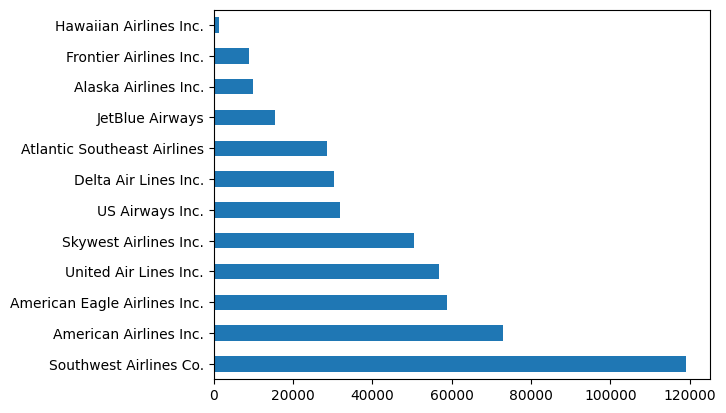

In [53]:
# Representación gráfica del número de valores por aerolínea
airlines_values= data.Airline.value_counts()
airlines_values.plot(kind='barh')

De acuerdo a esta gráfica la aerolínea con mayor número de vuelos en este dataset es Southwest Airlines Co., por lo que es la compañía con el mayor número de registro de retrasos en vuelos.

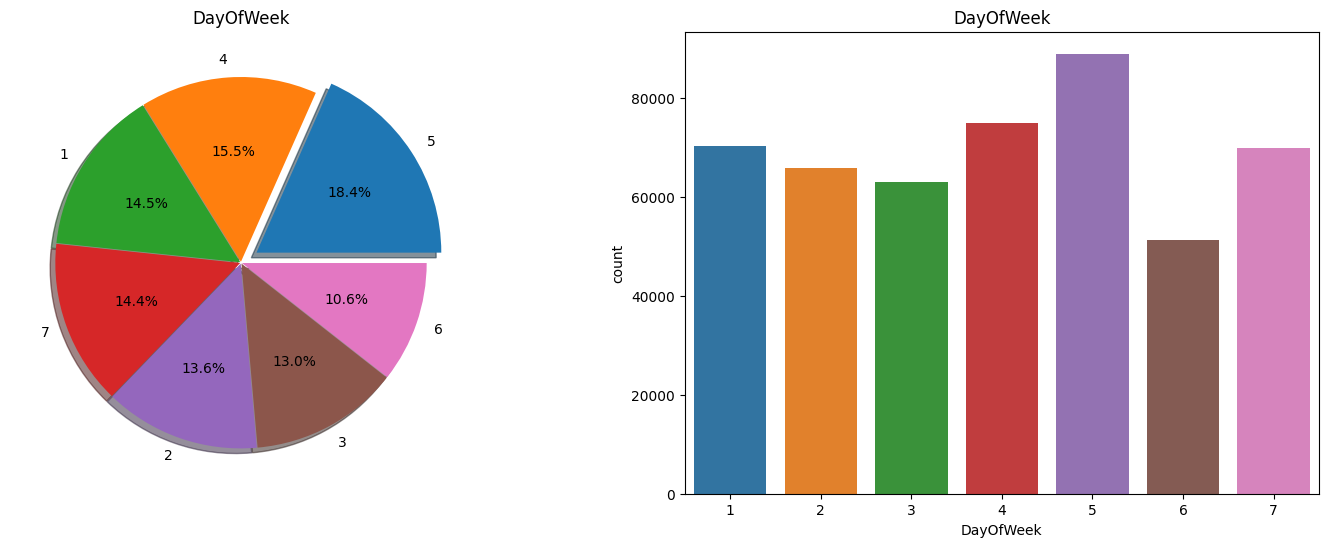

DayOfWeek representa si el vuelo tuvo retraso en Lunes(1), Martes(2), Miércoles(3), Jueves(4), FViernes(5), Sábado(6), Domingo(7)


In [54]:
# Analizamos en que dia de la semana ocurren mayor numero de retrasos 

df = data

# pie plot to show the days of week 
f,ax=plt.subplots(1,2,figsize=(18,6))
data['DayOfWeek'].value_counts().plot.pie(explode=[0.1,0.005,0.005,0.005,0.005,0.005,0.005],autopct='%1.1f%%',ax=ax[0],shadow=True) 
ax[0].set_title('DayOfWeek')
ax[0].set_ylabel('')
sns.countplot(x='DayOfWeek', data=df,ax=ax[1])
ax[1].set_title('DayOfWeek')
plt.show()

print('DayOfWeek representa si el vuelo tuvo retraso en Lunes(1), Martes(2), Miércoles(3), Jueves(4), FViernes(5), Sábado(6), Domingo(7)')

Como se observa en los gráficos, el día de la semana con mayor número de retrasos es el viernes.

# Codificación de variables categóricas

Dentro del preprocesamiento, se debe aplicar la codificación. Las columnas categóricas deben estar codificadas

In [55]:
# Codificación de variables

# Variables categóricas
categorical = ['DayOfWeek', 'UniqueCarrier', 'Airline', 'Origin', 'Dest', 'Diverted', 'Cancelled']
print("Numero de variables categóricas: ",  len(categorical))

# Variables numéricas
# numeric = data.select_dtypes(include=np.number).columns.tolist()
numeric = [col for col in data.columns if col not in categorical and col != 'Delayed_Over_3h']

print("Numero de variables numéricas: ",len(numeric))

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print(categorical)

# Codificar las variables categóricas
data_encoded = pd.get_dummies(data, columns=categorical)

Numero de variables categóricas:  7
Numero de variables numéricas:  18
['DayOfWeek', 'UniqueCarrier', 'Airline', 'Origin', 'Dest', 'Diverted', 'Cancelled']


In [56]:
# Preprocesado PCA
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorical)
    ])

# División del dataset en datos de entrenamiento y datos de test 

En este punto disponemos de una descripción de los datos y sus atributos, así como la distribución de los mismos y sabemos que los datos ya están acondicionados para poder usarlos en modelos de aprendizaje.

Sin embargo, antes de poder utilizar los modelos el siguiente paso es dividir los datos disponibles en datos de entrenamiento y datos de test. Haremos esta división en una proporción 80%-20%. 

De este modo usaremos un 80% de los datos para entrenar el modelo y el 20% restante lo usaremos para validar que el modelo funciona correctamente.

In [60]:
# Dividimos el Dataset en datos de entrenamiento y de test
# La clase objetivo será el retraso de llegada y los atributos de entrada el resto de atributos        

# Separamos los atributos y la clase objetivo
X = data.drop(columns=['Delayed_Over_3h'])
y = data['Delayed_Over_3h']

# Separamos los datos en Entrenamiento y validación/test 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizamos los tamaños y una muestra de los datos para verificar que se haya dividido correctamente
print("Atributos de Entrenamiento: ", X_train.shape, " - Clases de Entrenamiento: ", y_train.shape)
print("Atributos de Validación:    ", X_validation.shape, " - Clases de Validación:    ", y_validation.shape)

# Calculamos el porcentaje de datos de entrenamiento con respecto al total de datos
porcentaje_train = (X_train.shape[0] / X.shape[0]) * 100
print(f"Porcentaje (X_train): {porcentaje_train:.2f}% del total de datos.")

Atributos de Entrenamiento:  (387640, 25)  - Clases de Entrenamiento:  (387640,)
Atributos de Validación:     (96911, 25)  - Clases de Validación:     (96911,)
Porcentaje (X_train): 80.00% del total de datos.


PCA no admite entradas dispersas, mientras que el OneHotEncoder produce una matriz dispersa por defecto.  Como tenemos muchas categorías, será más eficiente sería usar TruncatedSVD, que está diseñado para trabajar con entradas dispersas.

In [61]:
# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_validation)

# Apply TruncatedSVD
svd = TruncatedSVD(n_components=10, random_state=42)
X_train_svd = svd.fit_transform(X_train_preprocessed)
X_test_svd = svd.transform(X_test_preprocessed)

## Modelo 1: Clasificación para la predicción de retraso

Se va a utilizar un modelo para predecir si un vuelo tendrá un retraso significativo (+3h) basado en varias aerolíneas.

In [62]:
model = LogisticRegression(random_state=42)
model.fit(X_train_svd, y_train)

y_pred = model.predict(X_test_svd)

# Evaluación modelo 
print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))

print("\nClassification Report:")
print(classification_report(y_validation, y_pred))

roc_auc = roc_auc_score(y_validation, y_pred)
print("\nROC AUC Score:", roc_auc)

Confusion Matrix:
[[92822   111]
 [  142  3836]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92933
           1       0.97      0.96      0.97      3978

    accuracy                           1.00     96911
   macro avg       0.99      0.98      0.98     96911
weighted avg       1.00      1.00      1.00     96911


ROC AUC Score: 0.981554630655406


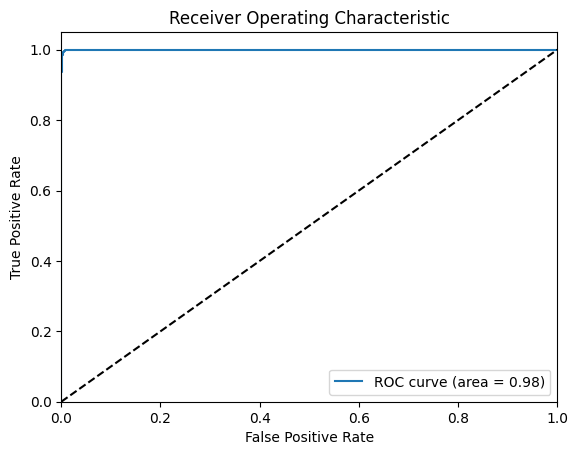

In [63]:
# Curva ROC

fpr, tpr, _ = roc_curve(y_validation, model.predict_proba(X_test_svd)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


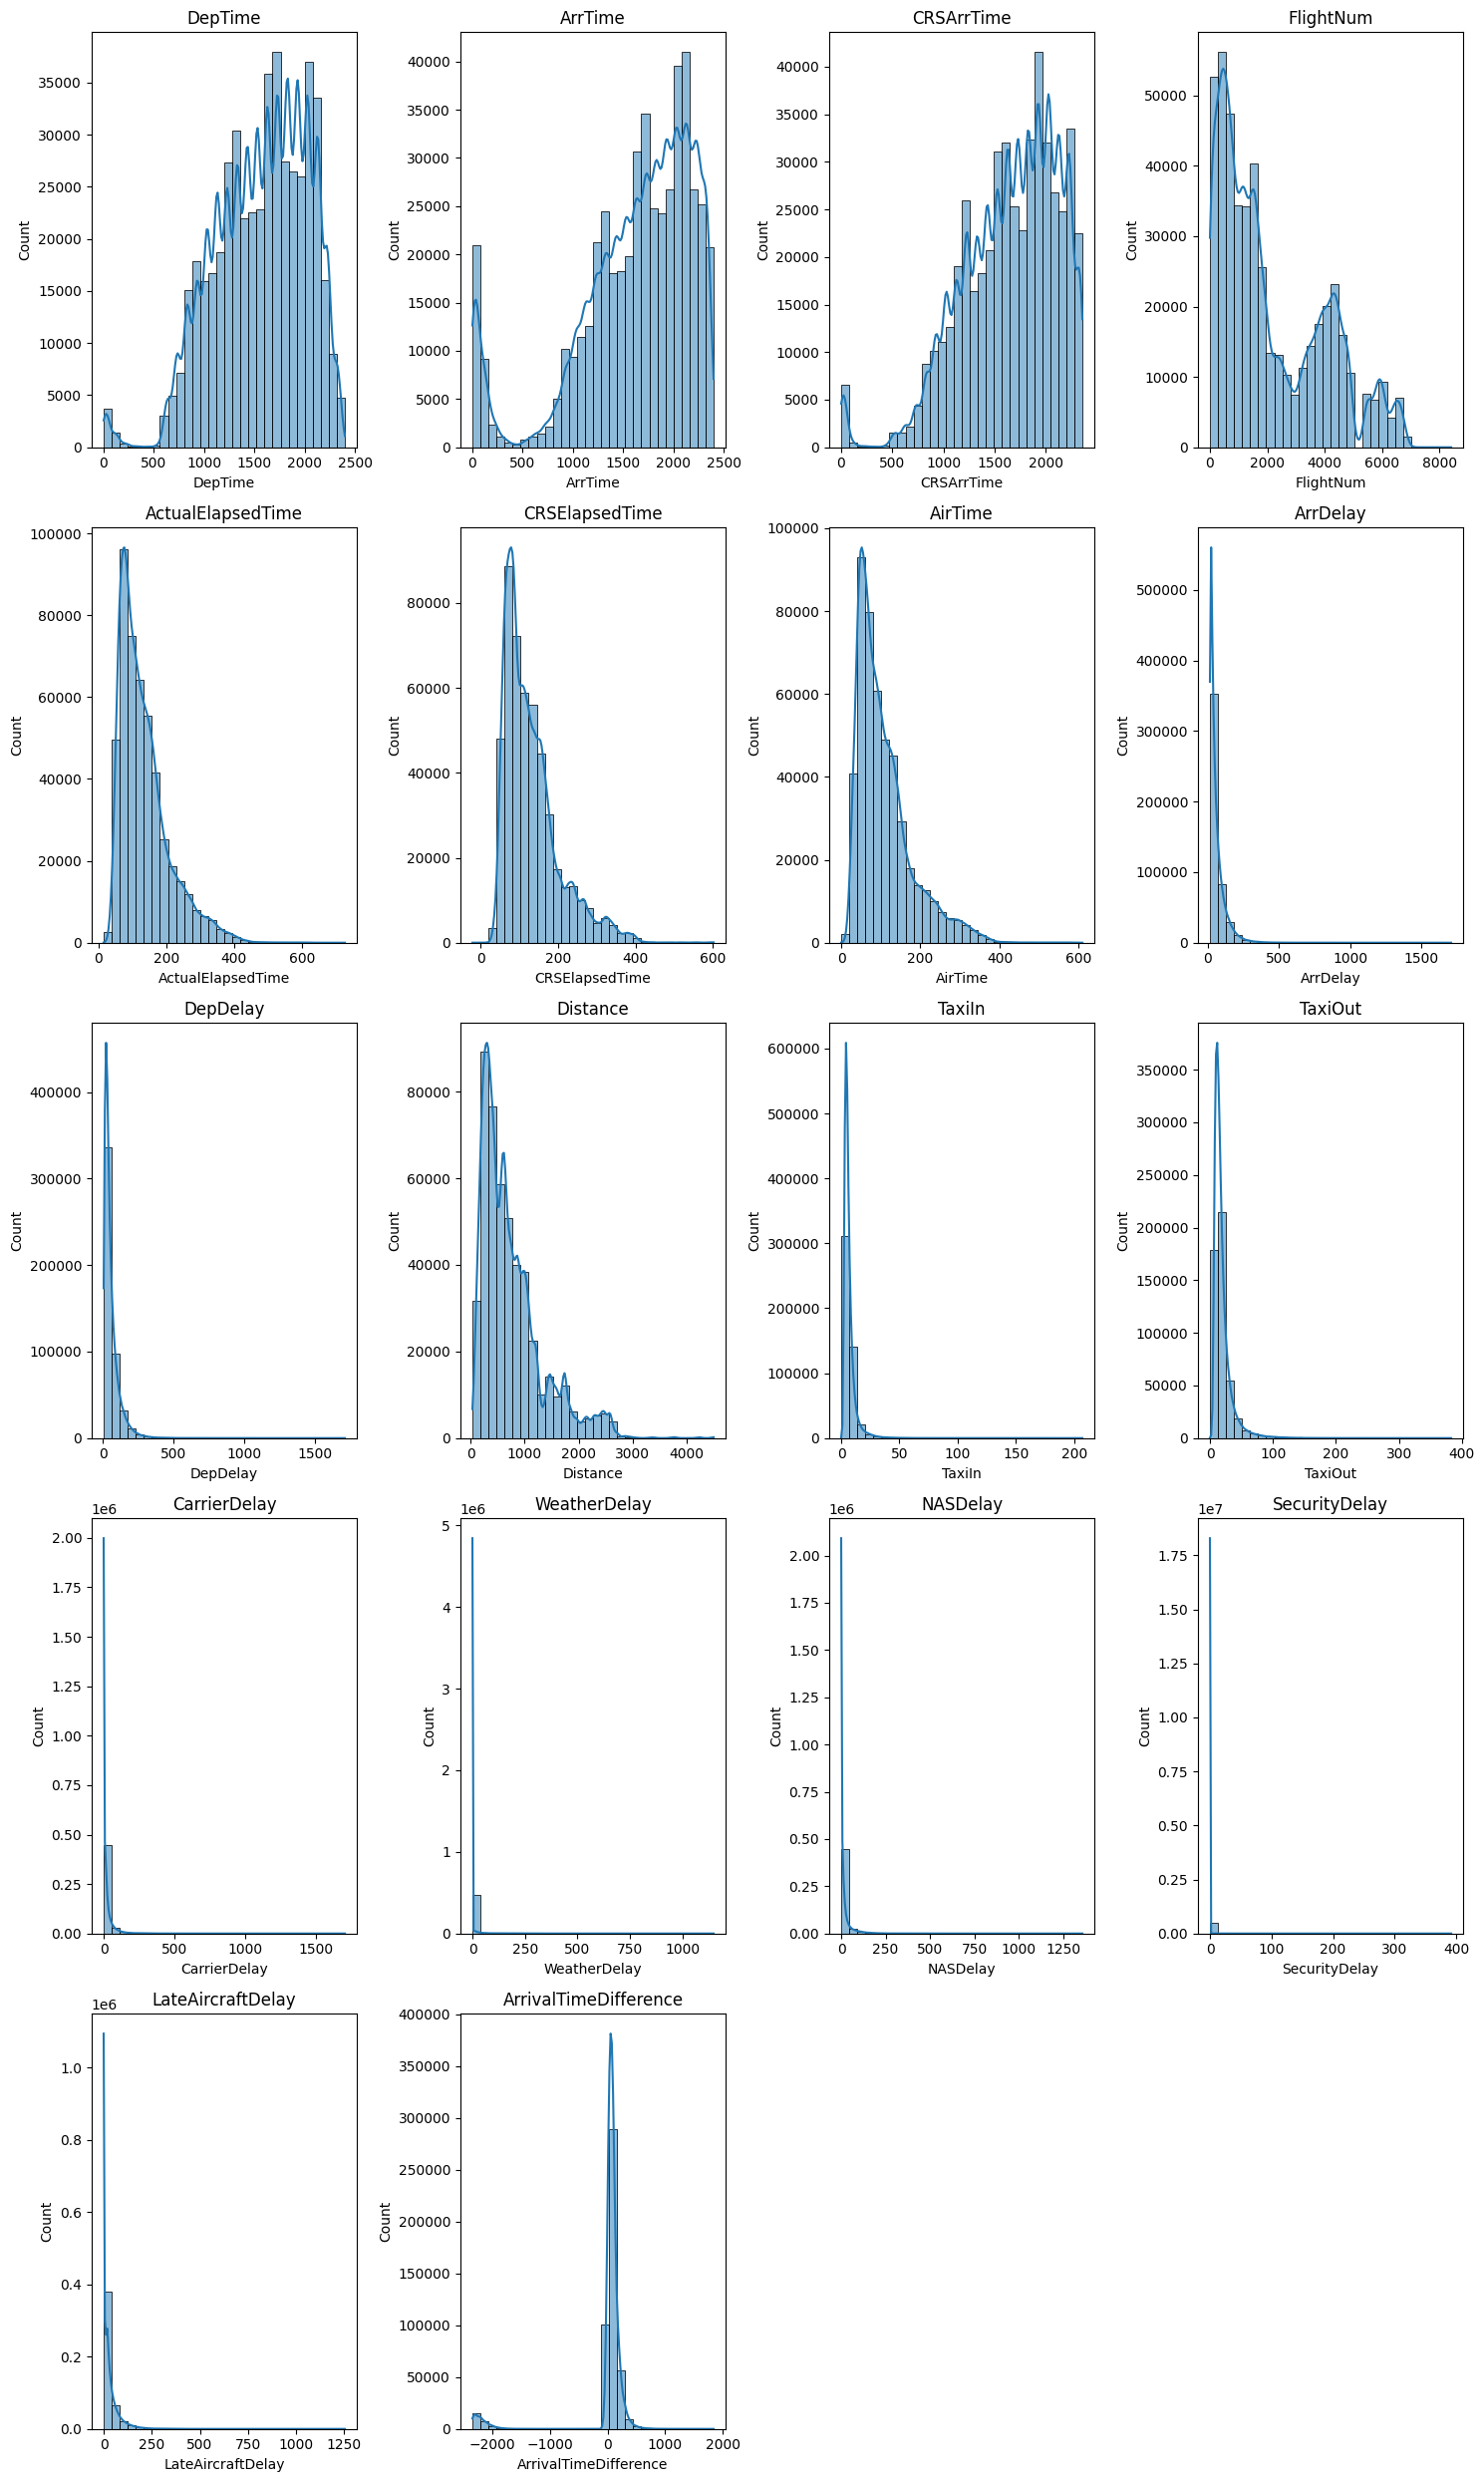

In [65]:
# Plot distributions of features
num_features = len(numeric)
cols = 4  # Number of columns in the subplot grid
rows = (num_features // cols) + 1  # Number of rows in the subplot grid

plt.figure(figsize=(15, rows * 5))
for i, column in enumerate(numeric, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


Cada histograma muestra la distribución de la variable, simétrica, cola larga izqda o drcha, multimiodal (picos o grupos ).
Los rangos de valores pueden ser positivos o negativos.
Los datos se concentran más cerca del máx o del minimo?

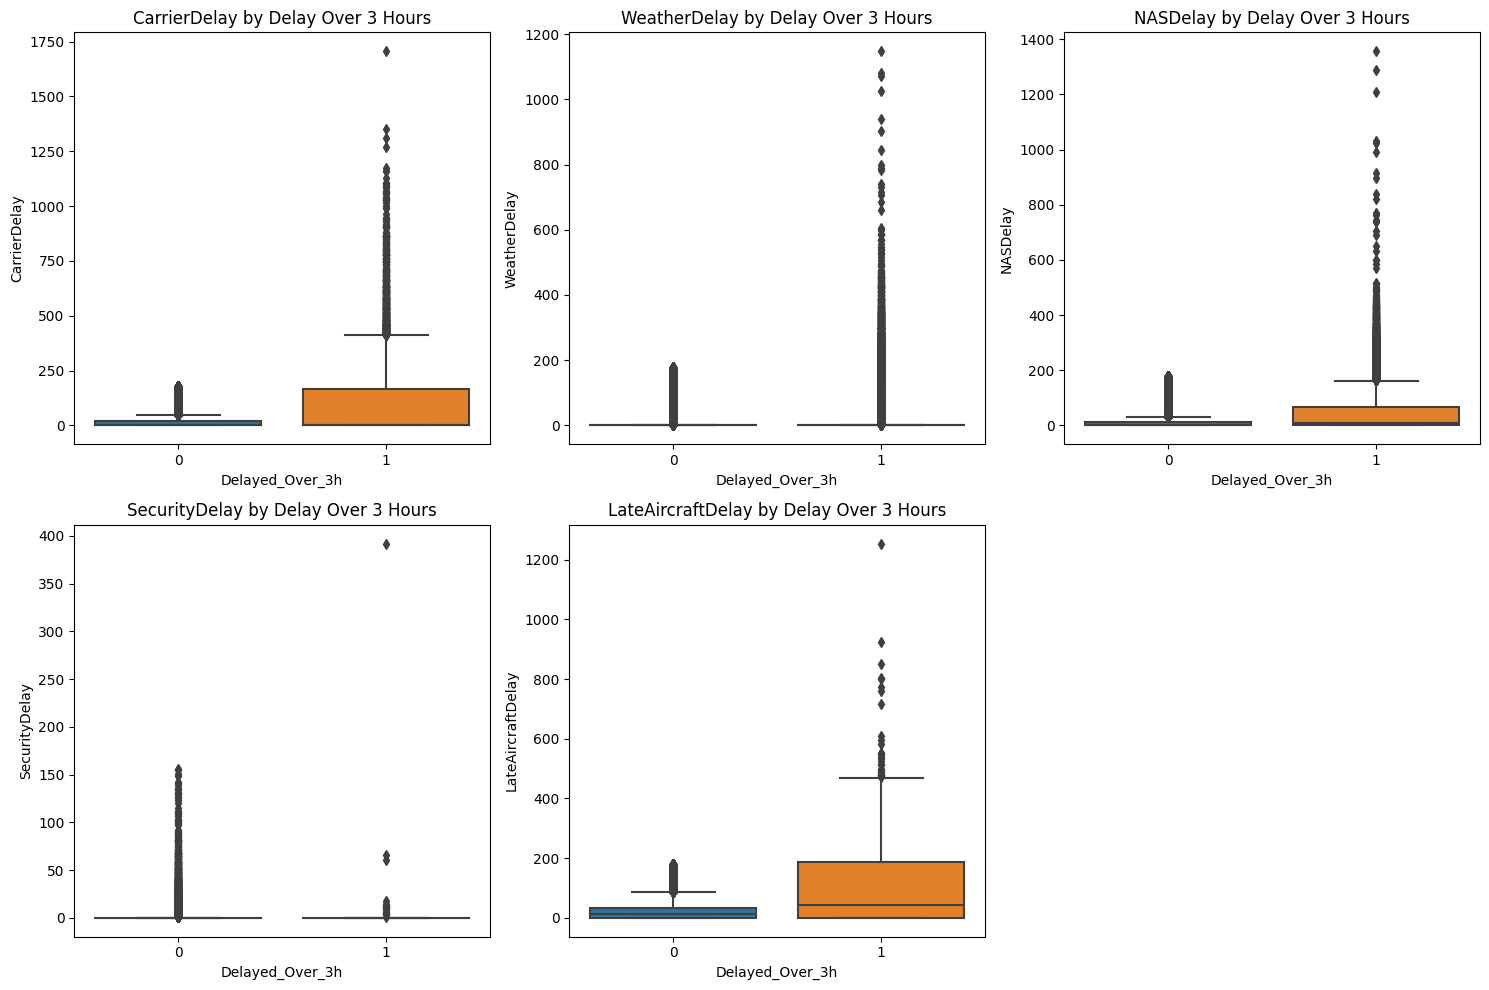

In [66]:

# Boxplots of delay types
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
num_delay_types = len(delay_types)
cols = 3  # Number of columns in the subplot grid
rows = (num_delay_types // cols) + 1  # Number of rows in the subplot grid

plt.figure(figsize=(15, rows * 5))
for i, column in enumerate(delay_types, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Delayed_Over_3h', y=column, data=data)
    plt.title(f'{column} by Delay Over 3 Hours')
plt.tight_layout()
plt.show()

Los boxplots muestran la distribución de una variable numérica y destacan los outliers. En este caso, se utilizan para comparar los diferentes tipos de retrasos entre vuelos que se retrasan más de 3 horas y los que no.

Comparación entre Grupos:

Mediana: La línea dentro de la caja representa la mediana (percentil 50) de los datos. ¿Es significativamente diferente entre los dos grupos?
Rango Intercuartílico (IQR): La caja muestra el IQR (percentiles 25 y 75). Un IQR más amplio indica más variabilidad.
Outliers: Los puntos fuera de los "bigotes" son outliers. Observa si hay muchos outliers en algún grupo específico.
Tipos de Retrasos:

CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay:
Compara los boxplots para ver cuál tipo de retraso es más prevalente en los vuelos retrasados más de 3 horas.
Un boxplot más alto indica que ese tipo de retraso contribuye significativamente a los retrasos prolongados.

### Interpretación de Resultados
A continuación, te doy algunas interpretaciones generales que podrías hacer basándote en las visualizaciones:

Distribución de Características Numéricas:

Si una característica como ArrDelay muestra una distribución sesgada a la derecha, significa que la mayoría de los vuelos tienen un retraso cercano a 0, pero hay algunos vuelos con retrasos muy largos.
Características como AirTime y CRSElapsedTime podrían mostrar distribuciones más simétricas si los tiempos de vuelo suelen ser consistentes.
Boxplots de Tipos de Retrasos:

Si CarrierDelay tiene una mediana alta y una gran variabilidad en los vuelos retrasados más de 3 horas, puedes concluir que los problemas con la aerolínea son una causa significativa de retrasos prolongados.
Si WeatherDelay y NASDelay muestran muchos outliers en vuelos retrasados más de 3 horas, indica que las condiciones meteorológicas y problemas del sistema nacional de aviación también son factores críticos.
Conclusiones y Acciones:
Factores que Contribuyen a los Retrasos:

Los tipos de retrasos con medianas más altas y más variabilidad son los que más contribuyen a los retrasos prolongados.
Políticas y Medidas:

Las aerolíneas pueden enfocarse en minimizar los tipos de retrasos más prevalentes (p.ej., CarrierDelay, WeatherDelay) para reducir los retrasos prolongados.
Mejorar la logística y la planificación puede ayudar a reducir los NASDelay.
Predicción y Mejora del Servicio:

Con esta información, se pueden desarrollar mejores modelos predictivos para anticipar retrasos prolongados y tomar medidas proactivas.

## Modelo 2

In [ ]:
def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


input_dim = X_train_svd.shape[1]
nn_model = build_model(input_dim)

# USar Early Stopping para prevenir sobreajuste 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = nn_model.fit(X_train_svd, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluación
nn_loss, nn_accuracy = nn_model.evaluate(X_test_svd, y_test)
print("\nNeural Network Test Loss:", nn_loss)
print("Neural Network Test Accuracy:", nn_accuracy)

# Predictions from neural network
nn_predictions = nn_model.predict(X_test_svd).ravel()
nn_pred_class = (nn_predictions > 0.5).astype(int)

# Model Evaluation for Neural Network
print("Confusion Matrix for Neural Network:")
print(confusion_matrix(y_test, nn_pred_class))

print("\nClassification Report for Neural Network:")
print(classification_report(y_test, nn_pred_class))

nn_roc_auc = roc_auc_score(y_test, nn_pred_class)
print("\nNeural Network ROC AUC Score:", nn_roc_auc)

# Plot ROC Curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_predictions)
plt.figure()
plt.plot(nn_fpr, nn_tpr, label='NN ROC curve (area = %0.2f)' % nn_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Comparación entre modelos

Procedmos a continuación a evaluar los modelos para comprobar qué modelo es preferible.

Se utilizaran métricas para evaluar los rendimientos como la precisión, recall, F1-score (clasificacion), MAE,  MSE, RMSE para regresión

In [ ]:
print("\nComparison of Models:")
print(f"Logistic Regression ROC AUC Score: {roc_auc}")
print(f"Neural Network ROC AUC Score: {nn_roc_auc}")

## Ajuste de Hiperparámetros

Técnicas como grid search o random search pueden ayudar a encontrar los mejores hiperparámetros para los modelos.

El ajuste de hiperparámetros es un proceso crucial para optimizar el rendimiento de un modelo de aprendizaje automático. Para la red neuronal, puedes usar técnicas como la búsqueda en cuadrícula (GridSearchCV) o la búsqueda aleatoria (RandomizedSearchCV). Aquí te mostraré cómo hacerlo usando RandomizedSearchCV de scikit-learn, ya que es más eficiente en términos de tiempo cuando se trabaja con una amplia gama de hiperparámetros.


Luego, aquí tienes un ejemplo de cómo realizar el ajuste de hiperparámetros para una red neuronal usando RandomizedSearchCV:

In [ ]:

# from sklearn.model_selection import RandomizedSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

# # Define the model creation function
# def create_model(optimizer='adam', init='glorot_uniform', neurons=1):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=input_dim, kernel_initializer=init, activation='relu'))
#     model.add(Dense(neurons, kernel_initializer=init, activation='relu'))
#     model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Wrap the Keras model so it can be used by scikit-learn
# model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define the grid of hyperparameters to search
# param_dist = {
#     'batch_size': [10, 20, 40, 60, 80, 100],
#     'epochs': [50, 100, 200],
#     'optimizer': ['SGD', 'Adam', 'Adagrad', 'RMSprop'],
#     'init': ['glorot_uniform', 'normal', 'uniform'],
#     'neurons': [10, 20, 30, 40, 50, 60]
# }

# # Use RandomizedSearchCV to search the grid
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the model
# random_search_result = random_search.fit(X_train_svd, y_train)

# # Summarize results
# print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

# # Train the best model on the full training data
# best_model = random_search_result.best_estimator_
# best_model.fit(X_train_svd, y_train)

# # Evaluate the best model
# nn_loss, nn_accuracy = best_model.model.evaluate(X_test_svd, y_test)
# print("\nBest Neural Network Test Loss:", nn_loss)
# print("Best Neural Network Test Accuracy:", nn_accuracy)

# # Predictions from the best neural network model
# nn_predictions = best_model.predict(X_test_svd)
# nn_pred_class = (nn_predictions > 0.5).astype(int)

# # Model Evaluation for the best neural network
# print("Confusion Matrix for the Best Neural Network:")
# print(confusion_matrix(y_test, nn_pred_class))

# print("\nClassification Report for the Best Neural Network:")
# print(classification_report(y_test, nn_pred_class))

# nn_roc_auc = roc_auc_score(y_test, nn_pred_class)
# print("\nBest Neural Network ROC AUC Score:", nn_roc_auc)

# # Plot ROC Curve for the best neural network
# nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_predictions)
# plt.figure()
# plt.plot(nn_fpr, nn_tpr, label='Best NN ROC curve (area = %0.2f)' % nn_roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc, linestyle='--')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

# # Compare Neural Network and Logistic Regression
# print("\nComparison of Models:")
# print(f"Logistic Regression ROC AUC Score: {roc_auc}")
# print(f"Best Neural Network ROC AUC Score: {nn_roc_auc}")
